# INBALANCED DATASET 

# Cross validation: 1) BALANCE THE DATA 2) RUN IT IN DIFFERENT MODELS

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df= pd.read_csv("DATA_Customer-Churn.csv")
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [3]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
#dropping the columns we dont want

In [4]:
df.drop(['gender', 'Partner', 'Dependents',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract'], axis=1, inplace=True)
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.5,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.5,No
7039,0,72,103.20,7362.9,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.6,Yes


In [ ]:
#converting to numeric

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,No
1,0,34,56.95,1889.50,No
2,0,2,53.85,108.15,Yes
3,0,45,42.30,1840.75,No
4,0,2,70.70,151.65,Yes
...,...,...,...,...,...
7038,0,24,84.80,1990.50,No
7039,0,72,103.20,7362.90,No
7040,0,11,29.60,346.45,No
7041,1,4,74.40,306.60,Yes


In [6]:
df.dtypes['TotalCharges'] 

dtype('float64')

In [11]:
# replacing values

In [7]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [8]:
df= df.dropna()

In [10]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,29.85,0
1,0,34,56.95,1889.50,0
2,0,2,53.85,108.15,1
3,0,45,42.30,1840.75,0
4,0,2,70.70,151.65,1
...,...,...,...,...,...
7038,0,24,84.80,1990.50,0
7039,0,72,103.20,7362.90,0
7040,0,11,29.60,346.45,0
7041,1,4,74.40,306.60,1


In [9]:
# df

In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


# X-Y SPLITTING: FIRST WE SPLIT THEN WE SMOTE then we model

In [17]:
X = df[['SeniorCitizen', 'tenure','MonthlyCharges','TotalCharges']]
y = df[['Churn']]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)


In [21]:
y_train

,Churn
6498,1
3369,0
2882,0
3670,0
972,0
...,...
1297,0
4030,0
5208,0
3781,0


In [22]:
y_train['Churn'].value_counts()

0    3626
1    1296
Name: Churn, dtype: int64

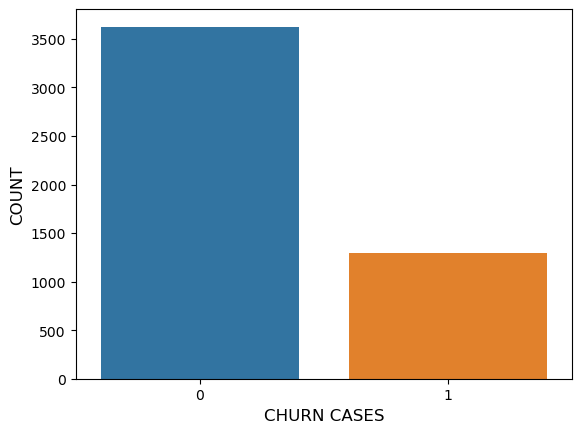

In [24]:
count_data= sns.countplot(x='Churn', data=y_train)
count_data.set_xlabel("CHURN CASES", fontsize=12)
count_data.set_ylabel("COUNT", fontsize=12)
plt.show()

# BALANCING DATA

In [25]:
from imblearn.over_sampling import SMOTE 

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [28]:
y_train_res

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
7247,1
7248,1
7249,1
7250,1


In [29]:
y_train_res['Churn'].value_counts()

1    3626
0    3626
Name: Churn, dtype: int64

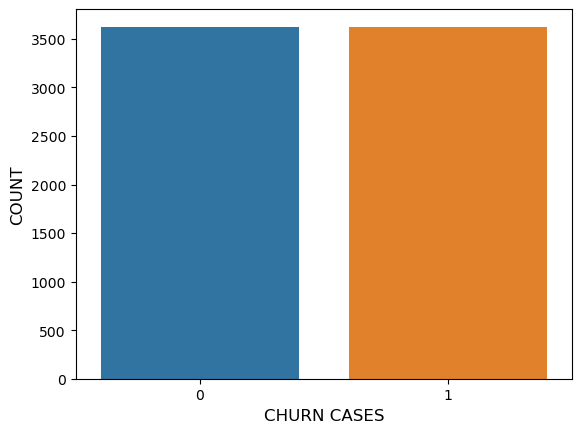

In [30]:
count_data= sns.countplot(x='Churn', data=y_train_res)
count_data.set_xlabel("CHURN CASES", fontsize=12)
count_data.set_ylabel("COUNT", fontsize=12)
plt.show()

In [31]:
X_train_res

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,82.300000,82.300000
1,1,11,55.600000,580.800000
2,0,11,64.900000,716.100000
3,0,33,24.250000,838.500000
4,0,58,70.100000,4048.950000
...,...,...,...,...
7247,0,1,45.792952,45.792952
7248,0,3,89.782551,336.482592
7249,0,18,86.914944,1588.754170
7250,0,4,89.451462,365.753631


In [32]:
y_train_res

,Churn
0,1
1,0
2,0
3,0
4,0
...,...
7247,1
7248,1
7249,1
7250,1


# MODEL 1: DECISION TREE

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix


#MAX DEPTH=2!!!!!!!
model = DecisionTreeClassifier(max_depth=2)

model.fit(X_train_res, y_train_res)

y_pred_train_dt_res = model.predict(X_train_res)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_res, y_pred_train_dt_res),
                                         precision_score(y_train_res, y_pred_train_dt_res),
                                         recall_score(y_train_res, y_pred_train_dt_res)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.679950,0.673934
1,Precision,0.680000,0.435321
2,Recall,0.679812,0.675393


# CONFUSSION MATRIX

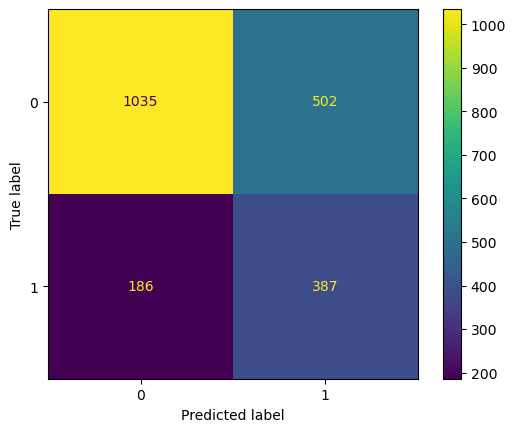

In [34]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

# DECISION TREE

<BarContainer object of 4 artists>

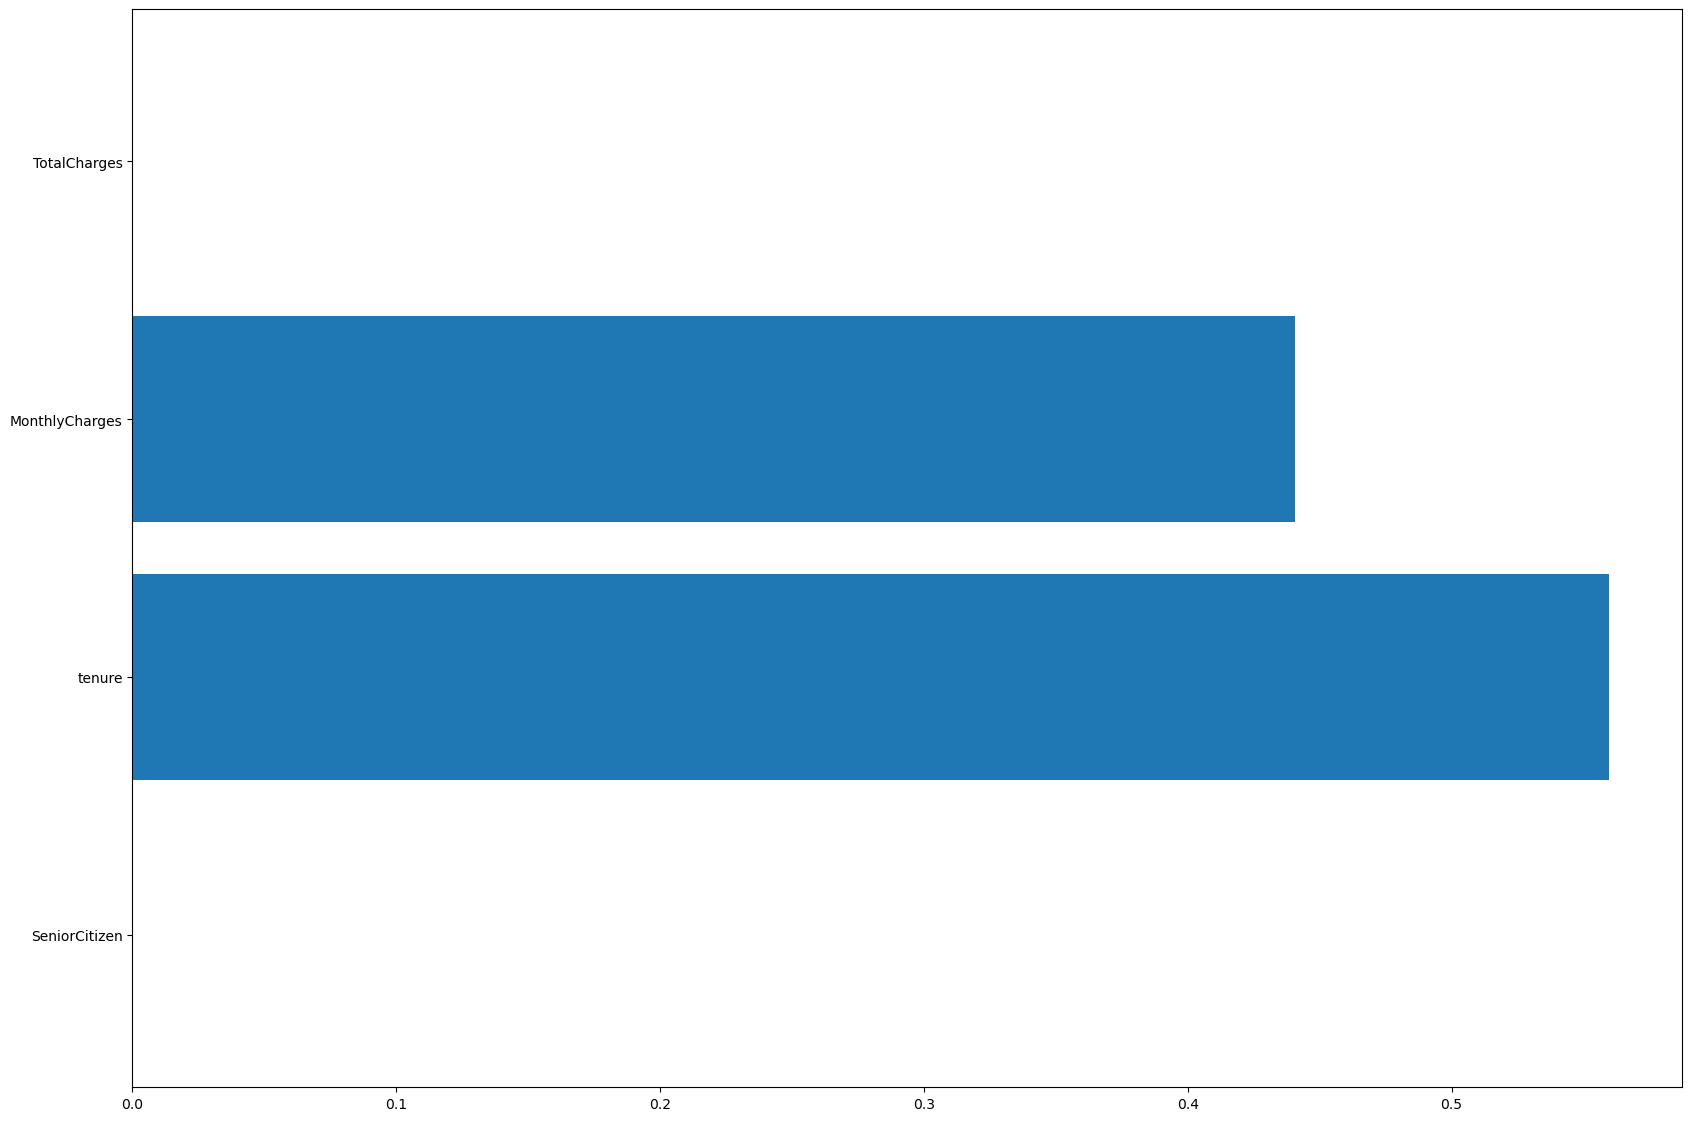

In [35]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

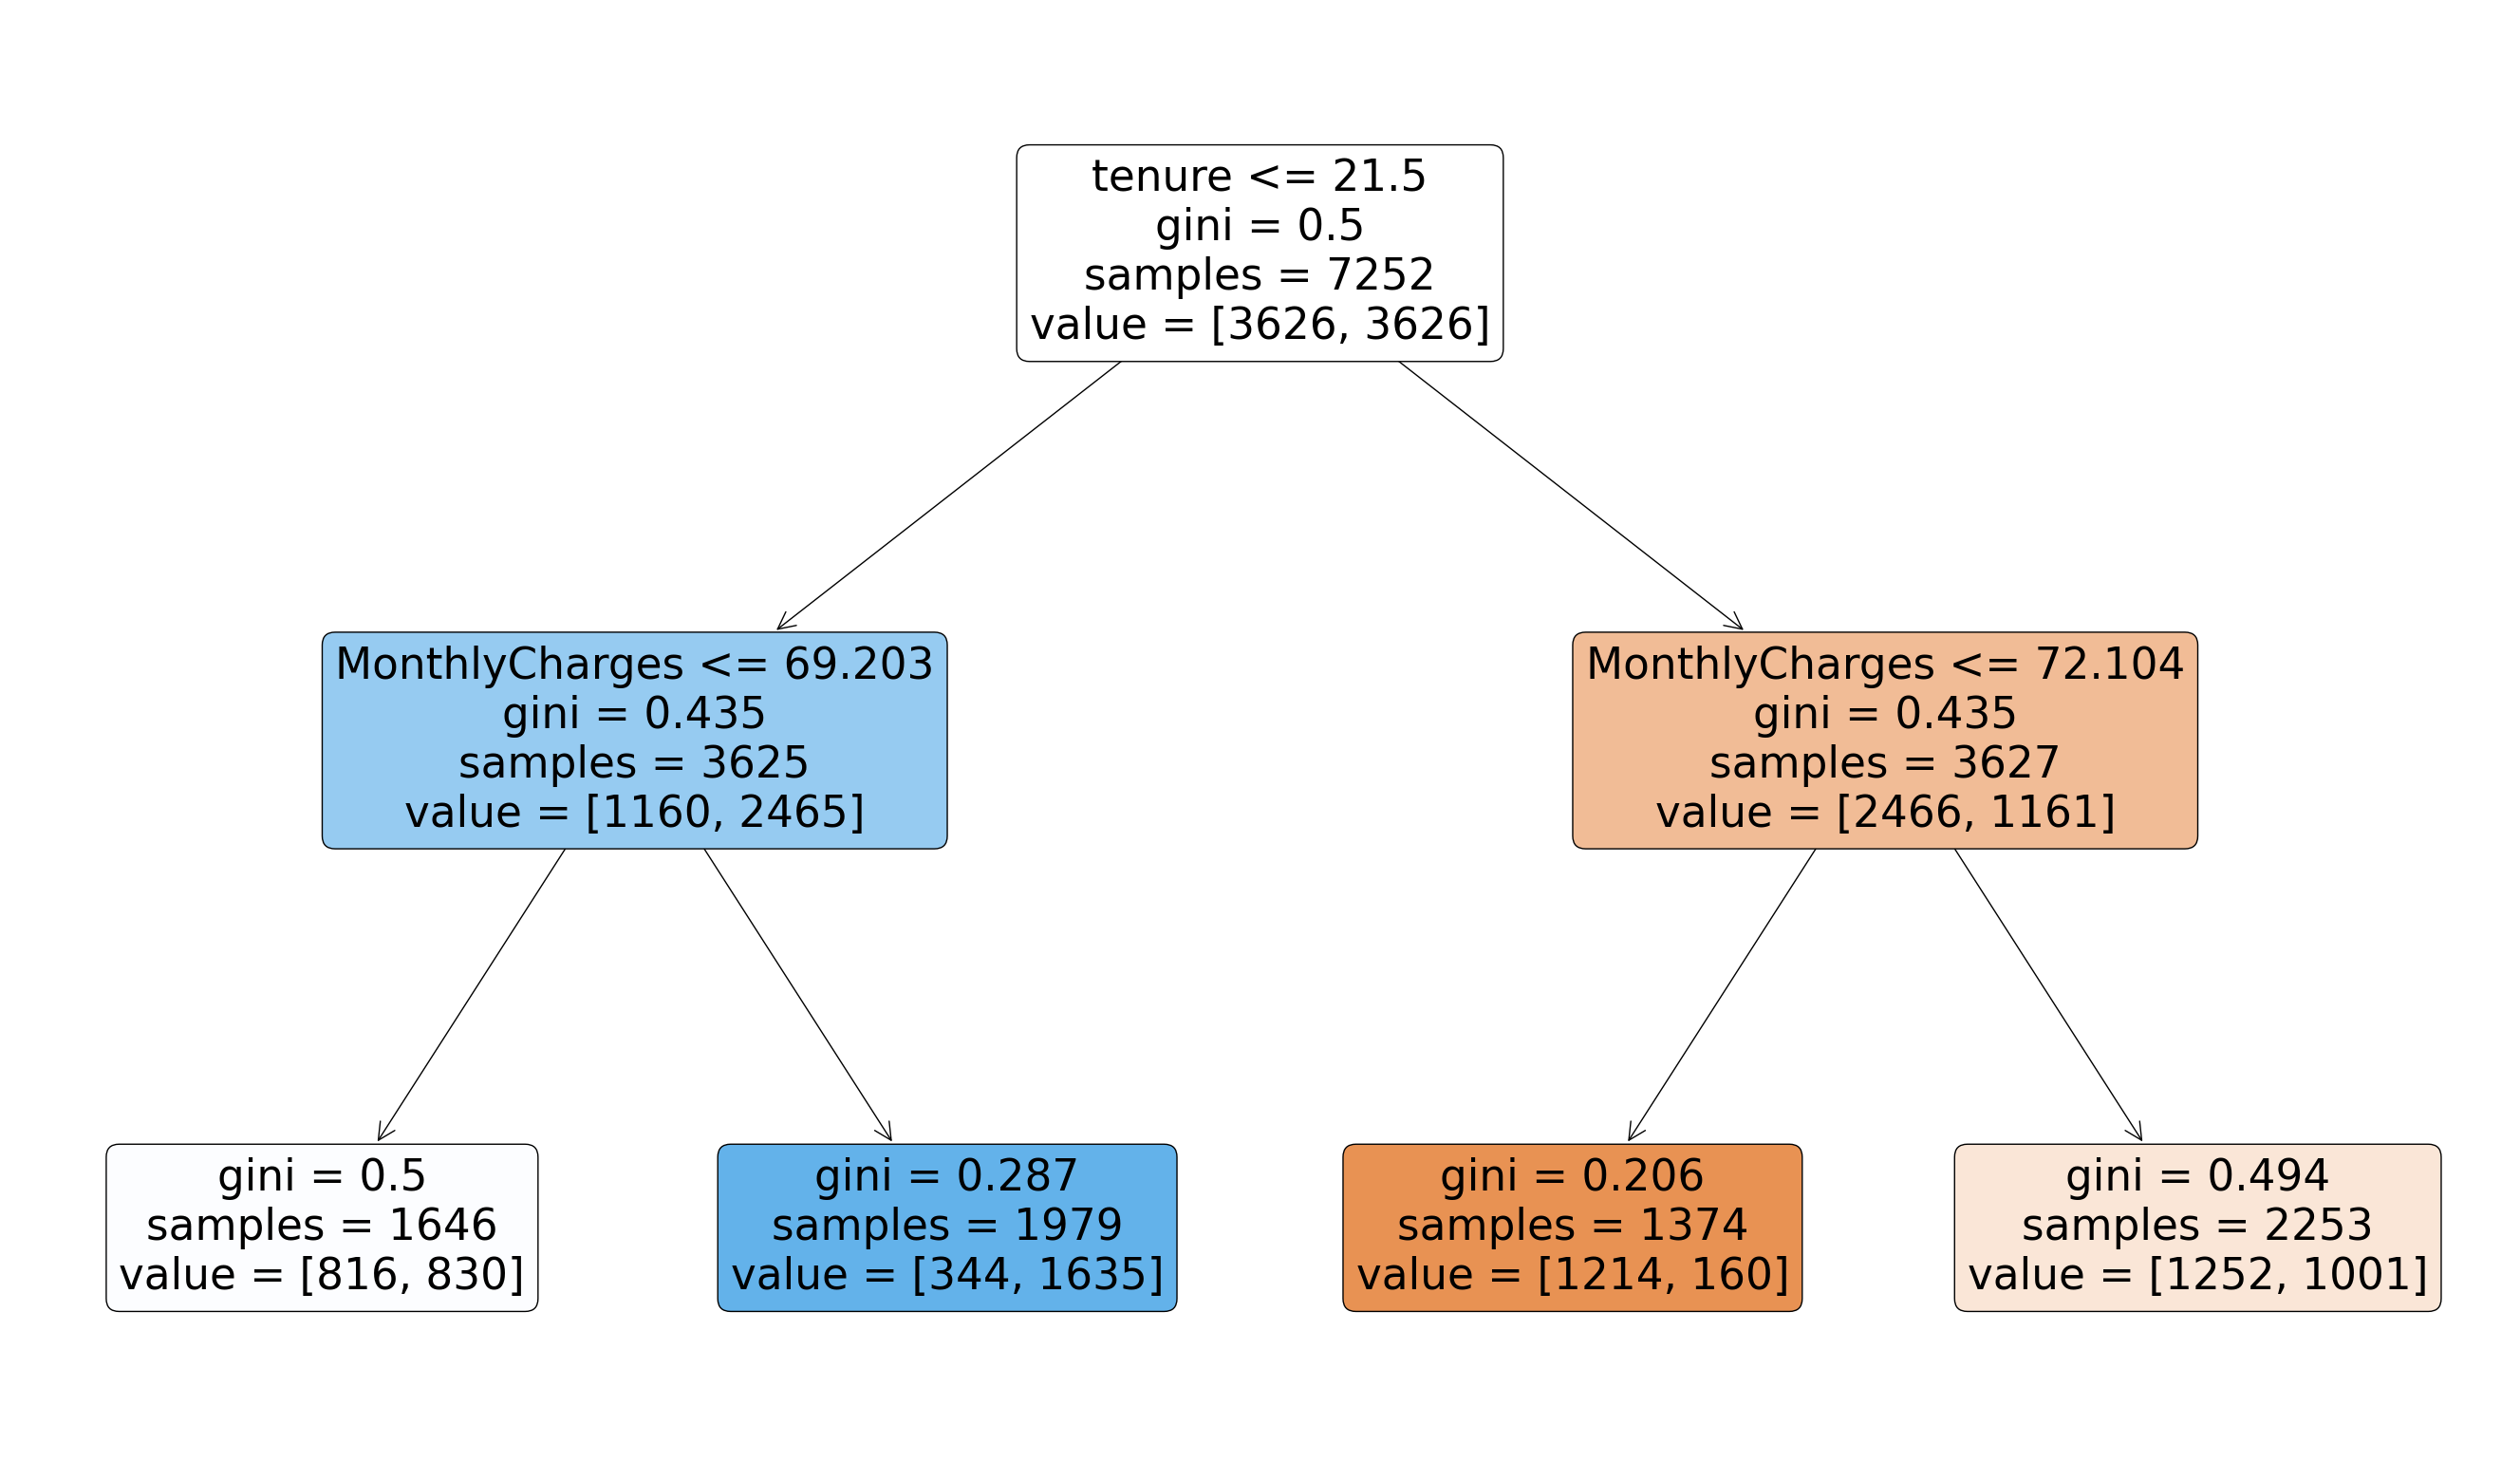

In [36]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

# MODEL 2: KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=10)

In [39]:
y_pred = knn.predict(X_test)

In [40]:
from sklearn.metrics import classification_report

In [41]:
print(classification_report(y_test, y_pred, digits=2))

              precision    recall  f1-score   support

           0       0.84      0.72      0.78      1537
           1       0.46      0.64      0.54       573

    accuracy                           0.70      2110
   macro avg       0.65      0.68      0.66      2110
weighted avg       0.74      0.70      0.71      2110



# MODEL 3: LOGISTIC

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [43]:
lr = LogisticRegression()

In [45]:
lr.fit(X_train_res, y_train_res)

LogisticRegression()

In [51]:
y_train_2 = lr.predict(X_train_res)
y_test_2 = lr.predict(X_test)

In [52]:
print(classification_report(y_test, y_test_2, digits=2))

              precision    recall  f1-score   support

           0       0.89      0.65      0.75      1537
           1       0.46      0.78      0.58       573

    accuracy                           0.69      2110
   macro avg       0.67      0.72      0.67      2110
weighted avg       0.77      0.69      0.71      2110

